In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('claimants.csv')
df = df.drop(columns = ['CASENUM'])
df['ATTORNEY'].value_counts() # This is a Balanced data

0    685
1    655
Name: ATTORNEY, dtype: int64

In [3]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

(array([295., 212.,  27., 182., 220., 115.,  54.,  28.,  15.,   3.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

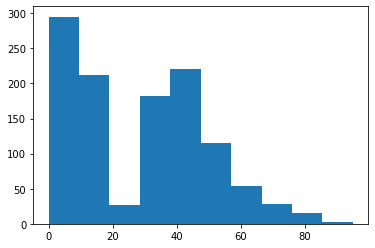

In [4]:
# check for normal distribution
plt.hist(df['CLMAGE']) #The graph is right-skewed
#Thus, blank values in CLMAGE column are replaced by median

In [5]:
# Replacing blank value in CLMAGE with its median
med_age = df['CLMAGE'].median() #30
med_age
df['CLMAGE'].replace(r'^\s*$', np.nan, regex=True)
df['CLMAGE'].fillna(med_age, inplace = True)
# df['CLMAGE'].isna().sum()

In [6]:
# Replacing blank value in CLMINSUR with the mode (because it is a categorical variable)
mode_sur = df['CLMINSUR'].mode() #1.0
# mode_sur[0]
df['CLMINSUR'].replace(r'^\s*$', np.nan, regex=True)
df['CLMINSUR'].fillna(mode_sur[0], inplace = True)

In [7]:
#Replacing blank value in CLMSEX with the mode
mode_sex = df['CLMSEX'].mode()
df['CLMSEX'].replace(r'^\s*$', np.nan, regex=True)
df['CLMSEX'].fillna(mode_sex[0], inplace = True)

In [8]:
#Replacing blank value in SEATBELT with the mode
mode_seat = df['SEATBELT'].mode()
df['SEATBELT'].replace(r'^\s*$', np.nan, regex = True)
df['SEATBELT'].fillna(mode_seat[0], inplace = True)

In [9]:
#change categorical variables into string
# df['CLMINSUR'] = df['CLMINSUR'].apply(str)
# df['CLMSEX'] = df['CLMSEX'].apply(str)
# df['SEATBELT'] = df['SEATBELT'].apply(str)
# df.info()

In [10]:
X = df.drop(columns = ['ATTORNEY'], axis = 1)
y = df['ATTORNEY']

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

# Initializing the model

model = LogisticRegression()

# Fitting the model with X and Y values of the dataset

model.fit(X,y)

LogisticRegression()

In [13]:
pred_y = model.predict(test_X)
pred_y

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

### Performance Matrix

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(confusion_matrix(test_y,pred_y))

[[133  68]
 [ 43 158]]


<AxesSubplot:>

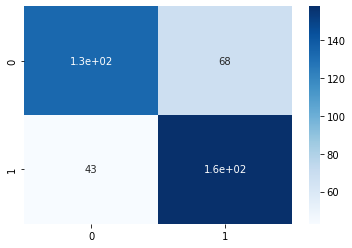

In [15]:
import seaborn as sn
sn.heatmap(confusion_matrix(test_y, pred_y), annot = True, cmap = 'Blues')

In [16]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       201
           1       0.70      0.79      0.74       201

    accuracy                           0.72       402
   macro avg       0.73      0.72      0.72       402
weighted avg       0.73      0.72      0.72       402



In [17]:
metrics.accuracy_score(test_y, pred_y)

0.7238805970149254

In [18]:
auc = metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1])
auc

0.7741763817727285

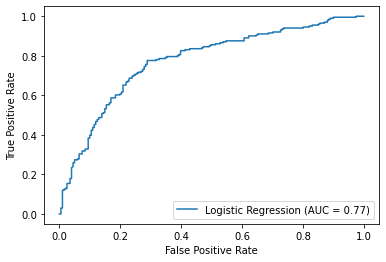

In [28]:
# Draw ROC Curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(test_y, model.decision_function(test_X))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')

display.plot()
plt.show()

In [20]:
# Gridsearch and Cross Validation to increase out-of-sample accuracy
from sklearn.model_selection import GridSearchCV
params =  {'penalty': ['l2'], 'C': range(1,50), 'solver': ['lbfgs', 'liblinear'],}

modelCV = GridSearchCV(LogisticRegression(max_iter=100000), params, cv=5, scoring='roc_auc')

modelCV.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': range(1, 50), 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

In [21]:
modelCV.best_score_

0.7527927256020039

In [22]:
modelCV.best_params_

{'C': 3, 'penalty': 'l2', 'solver': 'lbfgs'}

In [23]:
pred_y = modelCV.predict(test_X)

In [24]:
print(confusion_matrix(test_y,pred_y))

[[135  66]
 [ 42 159]]


In [25]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       201
           1       0.71      0.79      0.75       201

    accuracy                           0.73       402
   macro avg       0.73      0.73      0.73       402
weighted avg       0.73      0.73      0.73       402



In [26]:
metrics.roc_auc_score(test_y, modelCV.predict_proba(test_X)[:,1])

0.7747456746120145